In [25]:
import yfinance as yf
from datetime import datetime
import numpy as np

In [61]:
sym=yf.Ticker("SHOP")
df=sym.history(interval="1d",start="2021-12-06", end="2022-12-06")
del df['Dividends']
del df['Stock Splits']
diff = df['Close'].diff()
diff.dropna(inplace=True)
diff


Date
2021-12-07 00:00:00-05:00    9.238998
2021-12-08 00:00:00-05:00   -0.021988
2021-12-09 00:00:00-05:00   -2.534012
2021-12-10 00:00:00-05:00   -3.336990
2021-12-13 00:00:00-05:00   -6.443008
                               ...   
2022-11-29 00:00:00-05:00   -0.879997
2022-11-30 00:00:00-05:00    3.730000
2022-12-01 00:00:00-05:00    2.520000
2022-12-02 00:00:00-05:00   -0.340000
2022-12-05 00:00:00-05:00   -2.270000
Name: Close, Length: 251, dtype: float64

In [62]:
change_up = diff.copy()
change_down = diff.copy()
change_up[change_up < 0] = 0
change_up




Date
2021-12-07 00:00:00-05:00    9.238998
2021-12-08 00:00:00-05:00    0.000000
2021-12-09 00:00:00-05:00    0.000000
2021-12-10 00:00:00-05:00    0.000000
2021-12-13 00:00:00-05:00    0.000000
                               ...   
2022-11-29 00:00:00-05:00    0.000000
2022-11-30 00:00:00-05:00    3.730000
2022-12-01 00:00:00-05:00    2.520000
2022-12-02 00:00:00-05:00    0.000000
2022-12-05 00:00:00-05:00    0.000000
Name: Close, Length: 251, dtype: float64

In [63]:
change_down[change_down > 0] = 0
change_down


Date
2021-12-07 00:00:00-05:00    0.000000
2021-12-08 00:00:00-05:00   -0.021988
2021-12-09 00:00:00-05:00   -2.534012
2021-12-10 00:00:00-05:00   -3.336990
2021-12-13 00:00:00-05:00   -6.443008
                               ...   
2022-11-29 00:00:00-05:00   -0.879997
2022-11-30 00:00:00-05:00    0.000000
2022-12-01 00:00:00-05:00    0.000000
2022-12-02 00:00:00-05:00   -0.340000
2022-12-05 00:00:00-05:00   -2.270000
Name: Close, Length: 251, dtype: float64

In [64]:
diff.equals(change_down+change_up)

True

In [66]:
avg_up = change_up.rolling(14).mean()
avg_up

Date
2021-12-07 00:00:00-05:00         NaN
2021-12-08 00:00:00-05:00         NaN
2021-12-09 00:00:00-05:00         NaN
2021-12-10 00:00:00-05:00         NaN
2021-12-13 00:00:00-05:00         NaN
                               ...   
2022-11-29 00:00:00-05:00    0.927143
2022-11-30 00:00:00-05:00    1.193571
2022-12-01 00:00:00-05:00    0.972857
2022-12-02 00:00:00-05:00    0.763571
2022-12-05 00:00:00-05:00    0.763571
Name: Close, Length: 251, dtype: float64

In [69]:
avg_down = change_down.rolling(14).mean().abs()
avg_down.head(20)
# first 13 days mean wont be available as we take mean of every 14 days

Date
2021-12-07 00:00:00-05:00         NaN
2021-12-08 00:00:00-05:00         NaN
2021-12-09 00:00:00-05:00         NaN
2021-12-10 00:00:00-05:00         NaN
2021-12-13 00:00:00-05:00         NaN
2021-12-14 00:00:00-05:00         NaN
2021-12-15 00:00:00-05:00         NaN
2021-12-16 00:00:00-05:00         NaN
2021-12-17 00:00:00-05:00         NaN
2021-12-20 00:00:00-05:00         NaN
2021-12-21 00:00:00-05:00         NaN
2021-12-22 00:00:00-05:00         NaN
2021-12-23 00:00:00-05:00         NaN
2021-12-27 00:00:00-05:00    2.077714
2021-12-28 00:00:00-05:00    2.256072
2021-12-29 00:00:00-05:00    2.254501
2021-12-30 00:00:00-05:00    2.073500
2021-12-31 00:00:00-05:00    1.984073
2022-01-03 00:00:00-05:00    1.625644
2022-01-04 00:00:00-05:00    2.328572
Name: Close, dtype: float64

In [72]:
rsi = 100* (avg_up/(avg_up+avg_down))
rsi

Date
2021-12-07 00:00:00-05:00          NaN
2021-12-08 00:00:00-05:00          NaN
2021-12-09 00:00:00-05:00          NaN
2021-12-10 00:00:00-05:00          NaN
2021-12-13 00:00:00-05:00          NaN
                               ...    
2022-11-29 00:00:00-05:00    60.064793
2022-11-30 00:00:00-05:00    71.288405
2022-12-01 00:00:00-05:00    66.928759
2022-12-02 00:00:00-05:00    60.191452
2022-12-05 00:00:00-05:00    56.292785
Name: Close, Length: 251, dtype: float64

<AxesSubplot:xlabel='Date'>

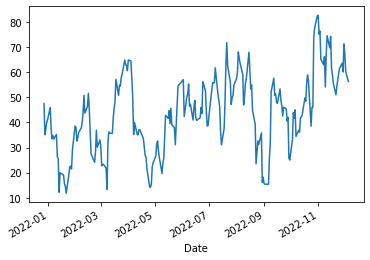

In [73]:
rsi.plot()

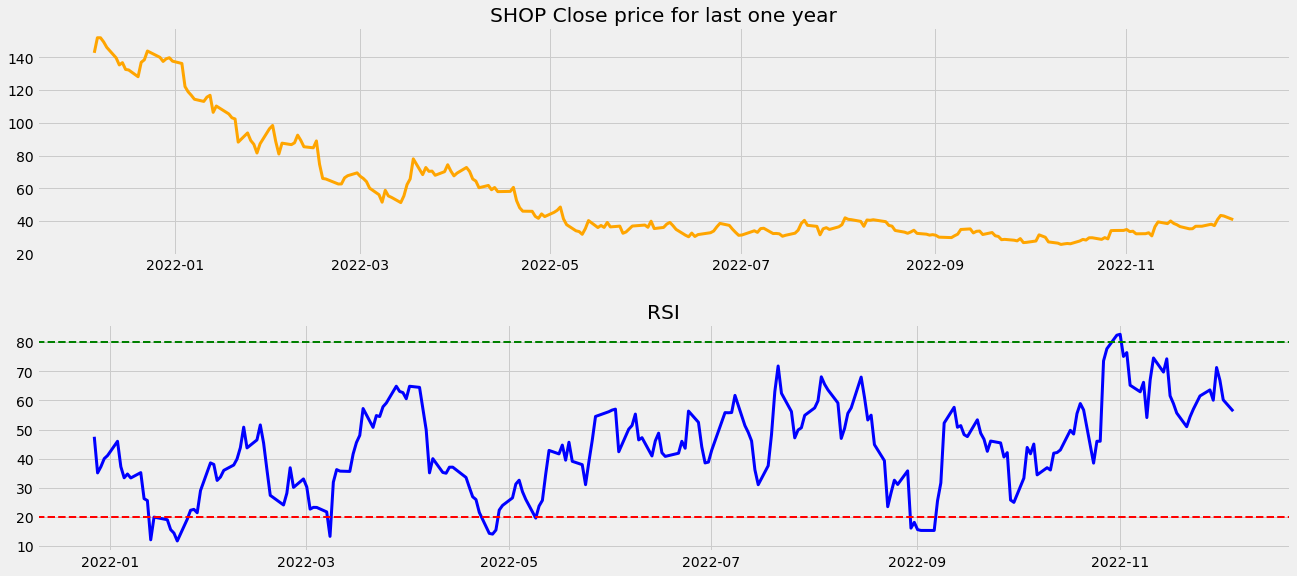

In [101]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =(20,10)

a1 = plt.subplot2grid((10,1),(0,0),rowspan = 4, colspan = 1)
a2 = plt.subplot2grid((10,1),(5,0),rowspan = 4, colspan = 1)

a1.plot(df['Close'], linewidth =3, color="Orange")
a1.set_title("SHOP Close price for last one year")

a2.plot(rsi, linewidth =3,color= "Blue")
a2.set_title("RSI")

a2.axhline(20,linestyle='--', linewidth=2, color='Red')
a2.axhline(80, linestyle='--',linewidth=2, color='Green')